# Problem Set 3: Constrained Optimization and Probability

# **Problem 1: Inbox (Poisson Distribution)**

### Context

This problem involves calculating the probability of receiving a certain number of emails within a specific time frame using the Poisson distribution.

In [ ]:
import numpy as np

# Set the arrival rate and time interval
#lamda = lam
lam = 30 / 60  # emails per minute
time_interval = 12  # minutes


# Define the number of simulations and initialize the count of successful simulations
trials = 1000000
success_count = 0


# Simulate the arrival times of the first five emails for each simulation
for trial in range(trials):
   arrival_times = np.cumsum(np.random.exponential(scale = 1 / lam, size=5))

   # Check if the 5th email arrived after 12 minutes
   if arrival_times[4] > time_interval:
       success_count += 1


# Calculate the probability of the 5th email arriving after 12 minutes
probability = success_count / trials

print("The probability that the 5th email arrives after 12 minutes is:", probability)

The probability that the 5th email arrives after 12 minutes is: 0.284636


# **Problem 2: Closing Time (Exponential Distribution)**

### Context

In this problem, we explore the concept of service times at a bank using exponential distributions. The goal is to find the time it takes to close the bank, considering two independent tellers.

In [ ]:
import random
import matplotlib.pyplot as plt

# Set up simulation parameters
lambda1 = 1
lambda2 = 2
num_simulations = 1000000
samples = []

# Simulate service times for both tellers and calculate max
for i in range(num_simulations):
    t1 = random.expovariate(lambda1)
    t2 = random.expovariate(lambda2)
    samples.append(max(t1, t2))

# Calculate mean and variance of samples
sim_mean = sum(samples) / num_simulations
sim_variance = sum((x - sim_mean)**2 for x in samples) / num_simulations

print("Simulated mean:", sim_mean)
print("Simulated variance:", sim_variance)


Simulated mean: 1.1673313892959967
Simulated variance: 0.91691787667257


In [ ]:
#Theoretical Mean and Variance
theoretical_mean = 1/lambda1 + 1/lambda2 - 1/(lambda1 + lambda2)
theoretical_variance = 1/lambda1**2 + 1/lambda2**2 - 1/(lambda1 + lambda2)**2
print("Theoretical Mean:", theoretical_mean)
print("Theoretical Variance:", theoretical_variance)


Theoretical Mean: 1.1666666666666667
Theoretical Variance: 1.1388888888888888


# **Problem 3: Radioactive Decay (Bayesian Estimation)**

### Context

This problem uses Bayesian estimation to determine the best estimate for the decay rate of radioactive particles. The problem involves calculating the posterior distribution using prior knowledge and observed data.

The parameter p is in the interval [0.07, 0.58] with probability 0.990
Best estimate 0.228


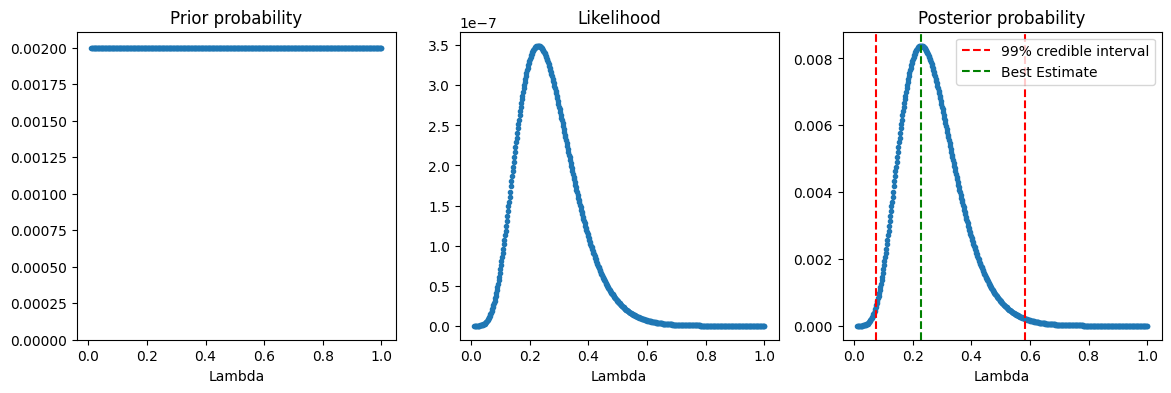

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(lambdas, distant_data):
    return lambdas**6 * np.exp(-lambdas * np.sum(distant_data))

# Defining data and known values.
lambdas = np.linspace(0.01, 1, 500)
prior = np.full(500, 1/500)
distant_data = [1.3, 2.3, 3.9, 6.1, 6.2, 6.5]

# Estimating Likelihood
likelihood = np.array(pdf(lambdas, distant_data))

# Estimating Marginal Likelihood
marginal_likelihood = np.sum(prior * likelihood)
posterior = prior * likelihood / marginal_likelihood

# Find the value of lambda with the highest posterior probability
best_estimate = lambdas[np.argmax(posterior)]

# Plotting Prior, Likelihood and Posterior plots
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.title('Prior probability')
plt.xlabel('Lambda')
plt.plot(lambdas, prior, '.')
plt.ylim(0)

plt.subplot(1, 3, 2)
plt.title('Likelihood')
plt.xlabel('Lambda')
plt.plot(lambdas, likelihood, '.')

plt.subplot(1, 3, 3)
plt.title('Posterior probability')
plt.xlabel('Lambda')
plt.plot(lambdas, posterior, '.')

# Finding the 99% credible interval
index = [32, 288]
interval = [lambdas[index[0]], lambdas[index[1]]]
interval_probability = np.sum(posterior[index[0]:index[1]+1])
print(
    f'The parameter p is in the interval [{interval[0]:.2f}, {interval[1]:.2f}] '
    f'with probability {interval_probability:.3f}')
print('Best estimate', round(best_estimate,3))
plt.axvline(interval[0], color='red', linestyle='--', label='99% credible interval')
plt.axvline(interval[1], color='red', linestyle='--')
plt.axvline(x=best_estimate, color='g', linestyle='--', label='Best Estimate')

plt.legend()
plt.show()